# Early detection of PSC differentitation - FastAi version

In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
from torchvision.models import *

import numpy as np
import pandas as pd
import seaborn as sns
import os


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
path=Path('/DATA/sgm/paper_murinas/img/t1')

In [5]:
tfms=get_transforms(do_flip=True, flip_vert=True, max_lighting=0.05)

In [6]:
data=ImageDataBunch.from_folder(path,
                                ds_tfms=get_transforms(flip_vert=True, max_lighting=0.05),
                                bs=16, 
                                test='test')

In [7]:
stats=data.batch_stats()
data.normalize(stats)

ImageDataBunch;

Train: LabelList (2034 items)
x: ImageItemList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: CategoryList
t1_indif,t1_indif,t1_indif,t1_indif,t1_indif
Path: /DATA/sgm/paper_murinas/img/t1;

Valid: LabelList (400 items)
x: ImageItemList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: CategoryList
t1_indif,t1_indif,t1_indif,t1_indif,t1_indif
Path: /DATA/sgm/paper_murinas/img/t1;

Test: LabelList (100 items)
x: ImageItemList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: EmptyLabelList
,,,,
Path: /DATA/sgm/paper_murinas/img/t1

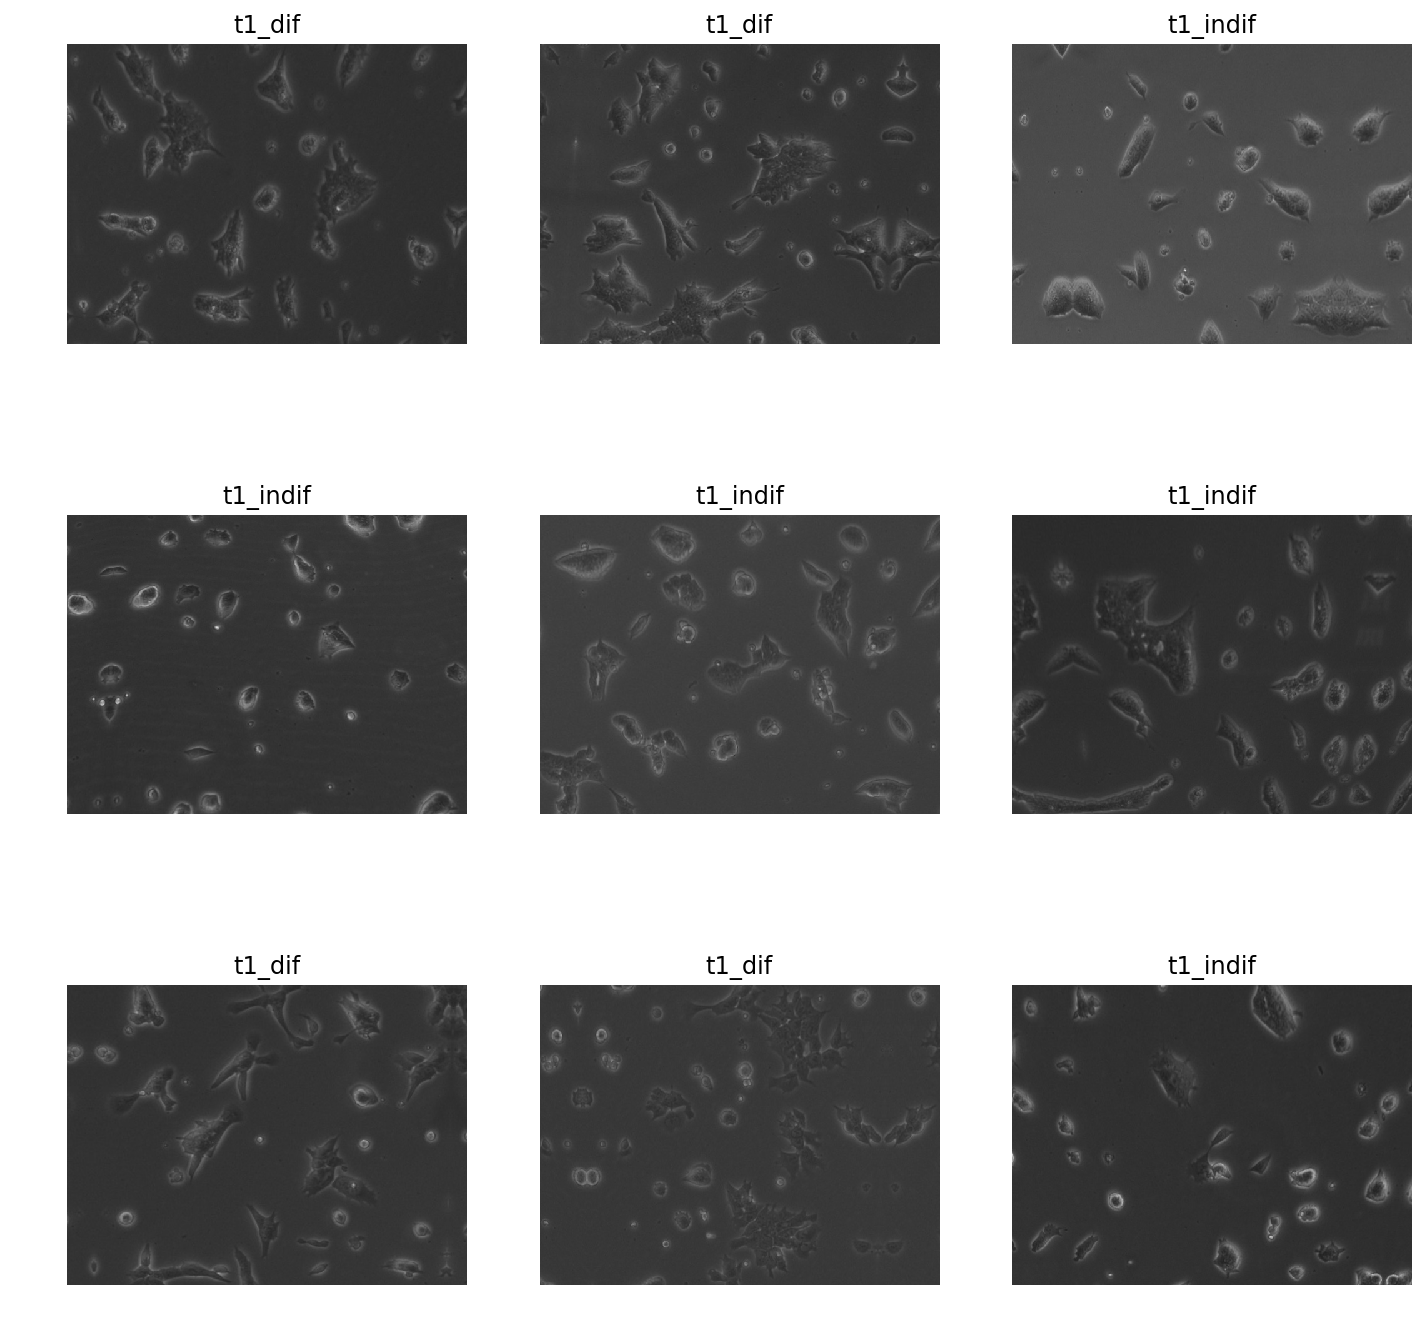

In [8]:
data.show_batch(rows=3, figsize=(10,10))

In [13]:
arch=resnet50
learner=create_cnn(data,arch, metrics=[accuracy],
                  model_dir='/DATA/sgm/paper_murinas/models/',
                  callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-02


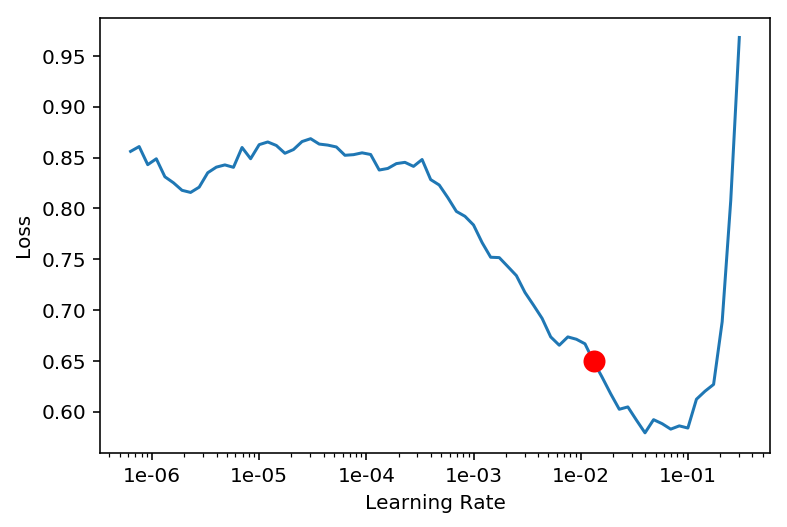

In [9]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy
1,0.214545,0.051212,0.987500


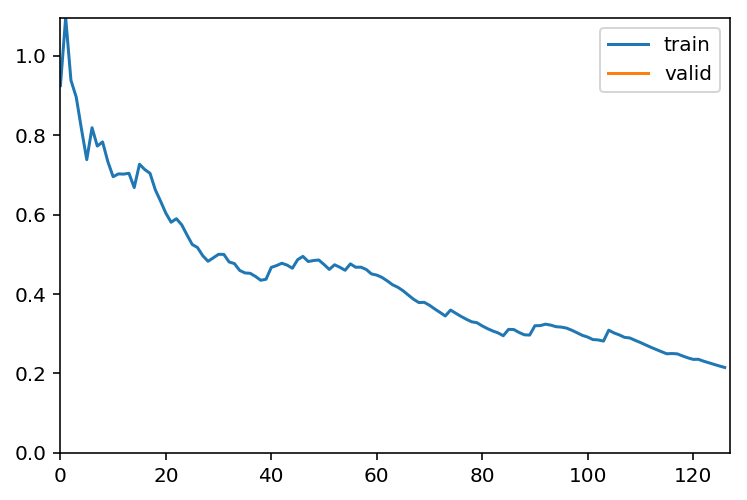

In [14]:
learner.fit_one_cycle(1, 1.32e-2)

In [15]:
learner.unfreeze()

epoch,train_loss,valid_loss,accuracy
1,0.106256,0.060207,0.970000
2,0.132151,0.064700,0.977500
3,0.086214,0.794648,0.762500
4,0.076189,0.021825,0.995000
5,0.077864,0.042357,0.982500
6,0.052926,0.026227,0.990000
7,0.038167,0.013900,0.995000
8,0.052349,0.014476,0.995000


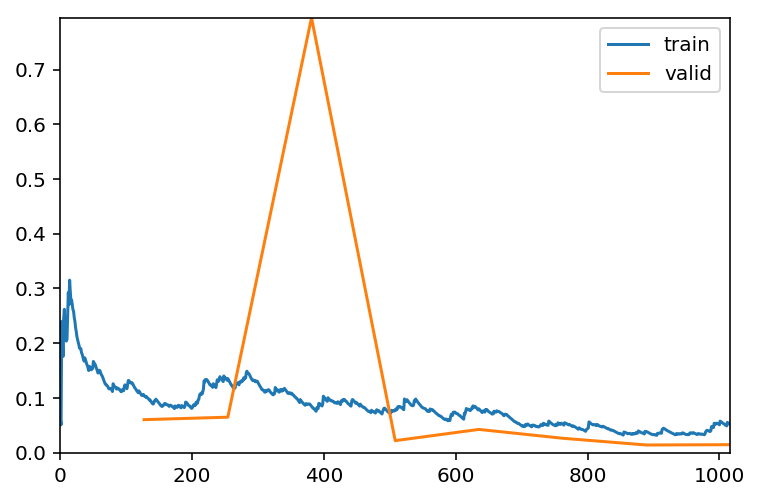

In [16]:
learner.fit_one_cycle(8, max_lr=slice(1e-5,1e-3), wd=0.1)

## Confusion Matrix

## Prediction from Independent samples

In [23]:
data = ImageDataBunch.from_folder(path, valid='test', ds_tfms=tfms, bs=16)
data.normalize(stats)
learner.data = data

In [24]:
interp = learner.interpret(ds_type=DatasetType.Valid, tta=True)

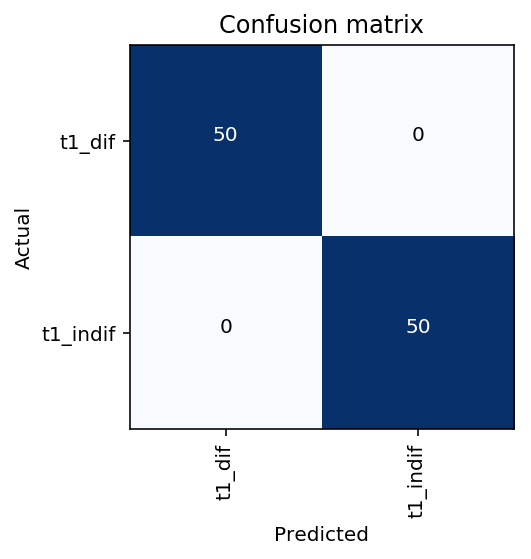

In [27]:
interp.plot_confusion_matrix()

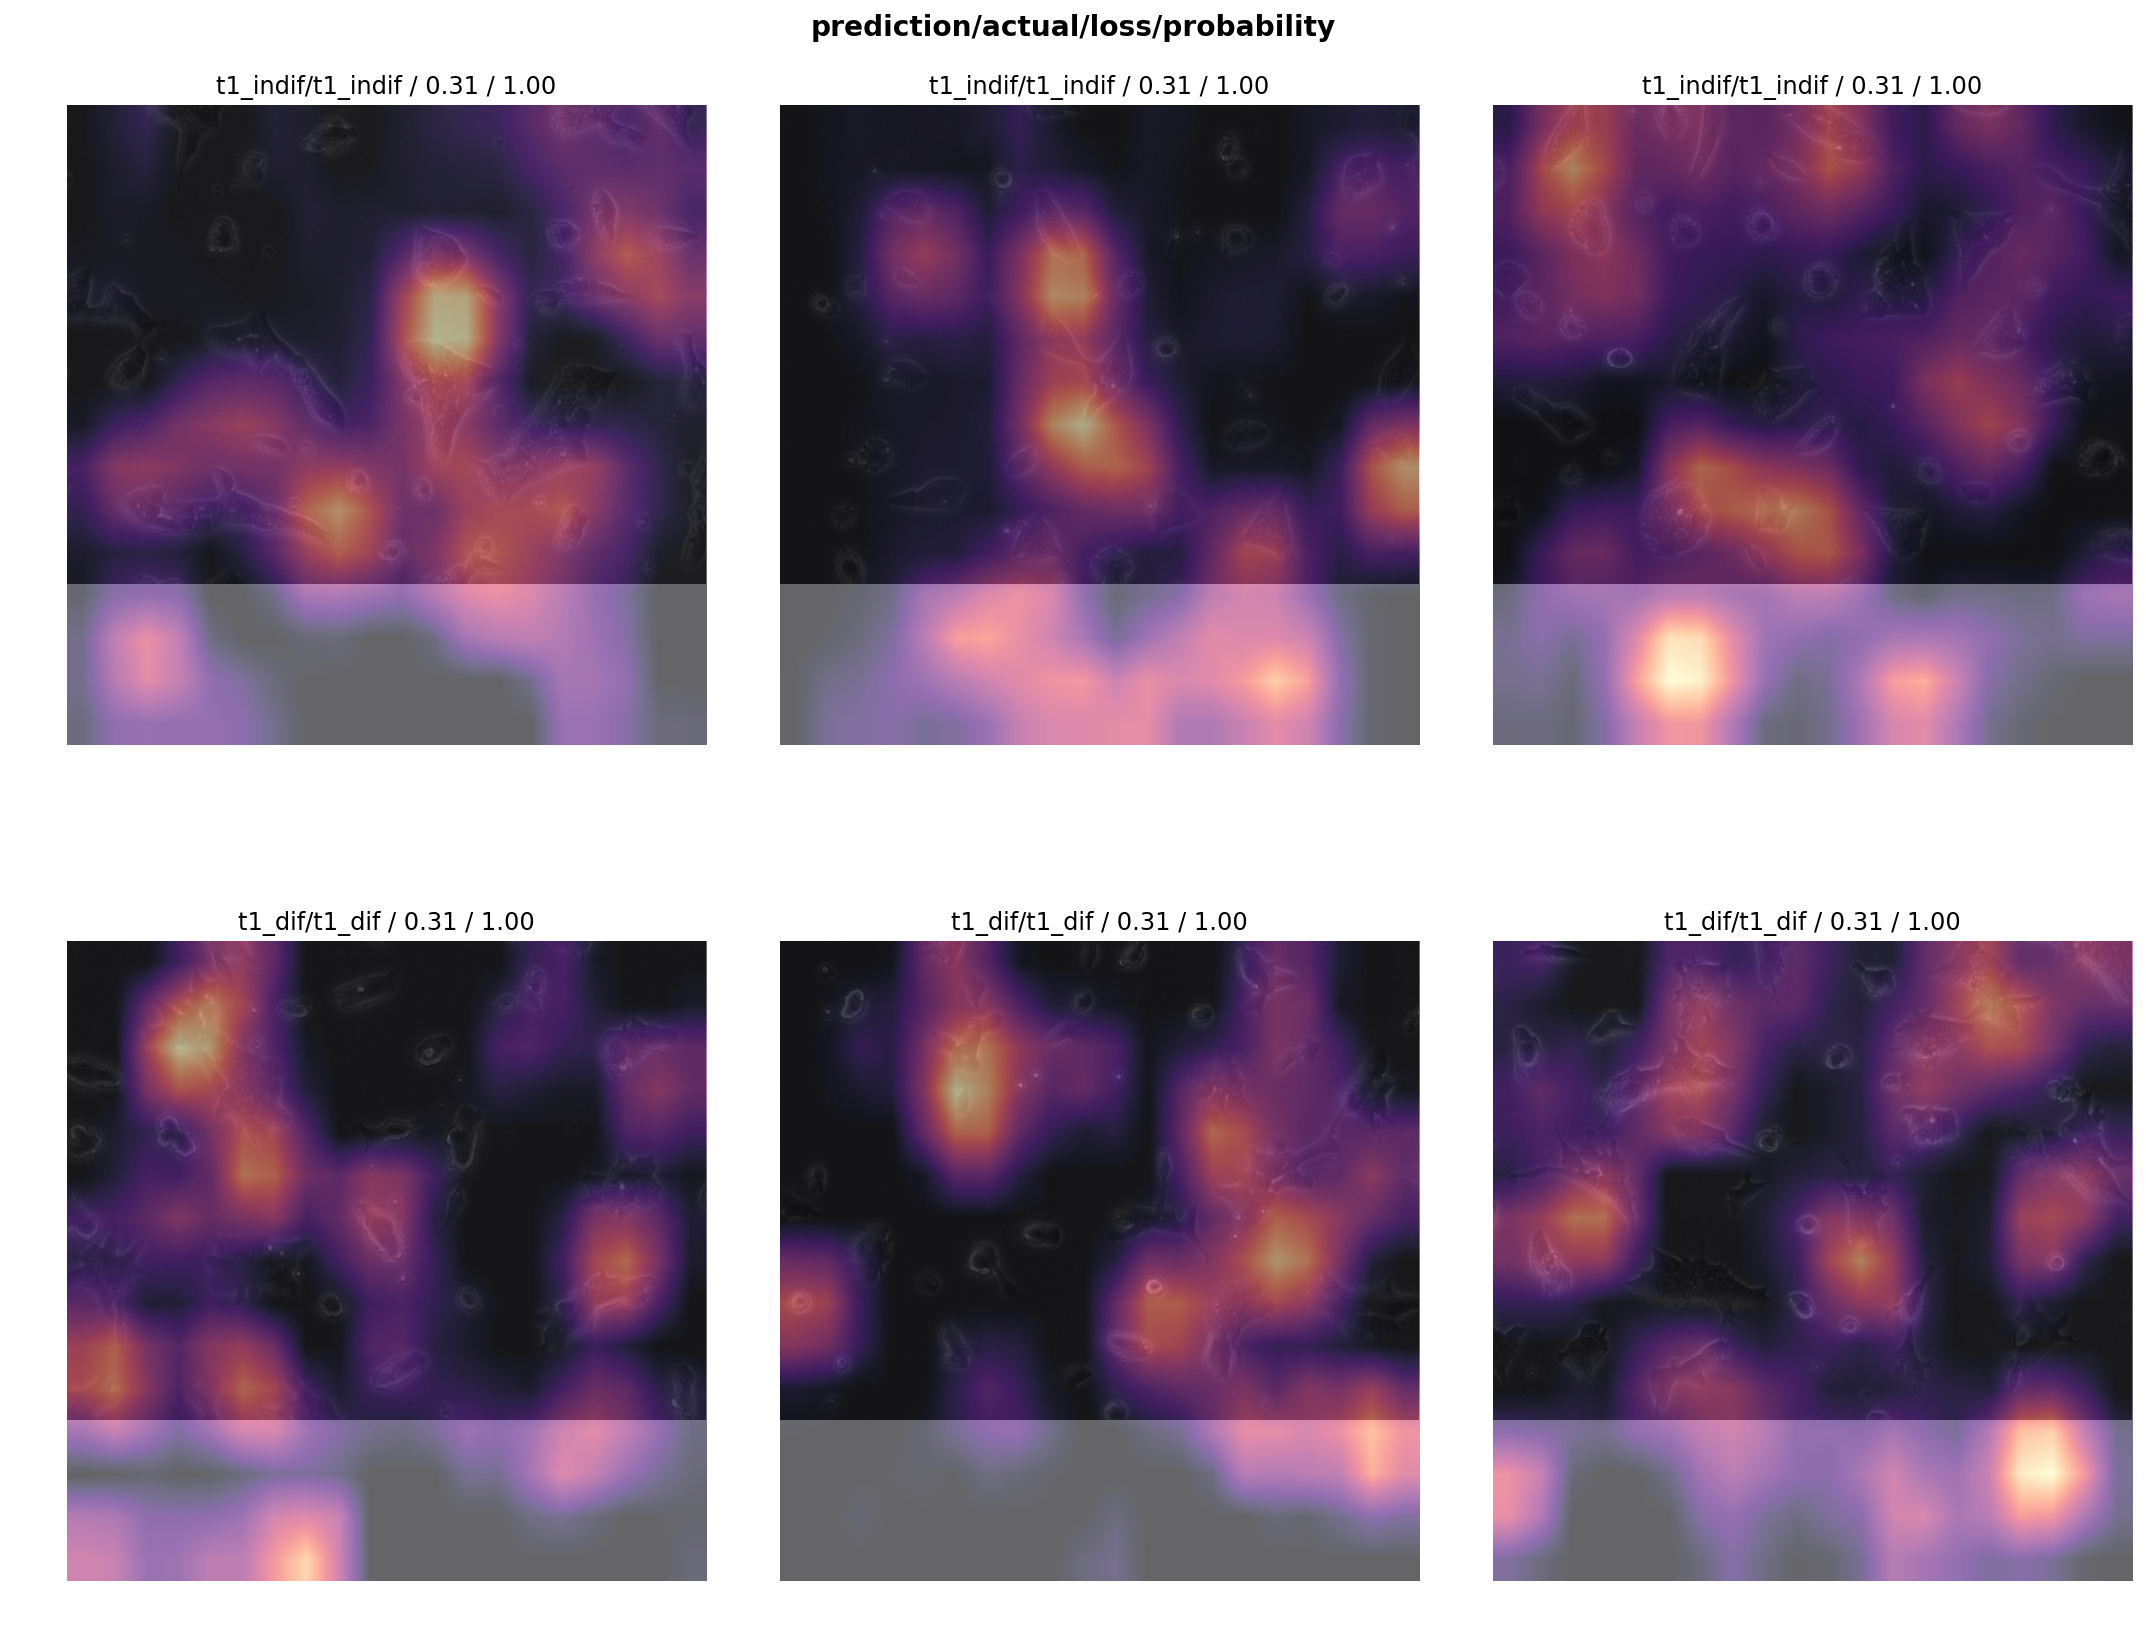

In [42]:
interp.plot_top_losses(6,figsize=(15,12), largest=False)